Steps Data--> Date Preprocessing --> Analysis ---> Train test Split-->Logictic regression model---> Evaluation

Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and processing

In [4]:
#loadin the data from csv file to pandas DataFrame

In [35]:
titanic_data = pd.read_csv('/content/tested.csv')

In [7]:
# printing the first 5 rows of the dataframe

In [36]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [11]:
#number of rows and columns

In [37]:
titanic_data.shape

(418, 12)

In [38]:
#checking info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [39]:
#check number of missing value in each coloumn
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
#handling the missing value

In [41]:
#drop the Cabin Column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [21]:
#replacing the missing values in Age column wiht mean value

In [43]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace= True)

In [44]:
#finding the mode value of
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [45]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace= True)

In [46]:
titanic_data.isnull().sum()
#now  no missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [26]:
#getiing some statistical measures about the data

In [47]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [28]:
#finding the number of people survived and not survived

In [48]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [52]:
import seaborn as sns

Data Visualization

In [53]:
sns.set()

In [32]:
#making a count plot for "survived column"

<Axes: xlabel='Survived', ylabel='count'>

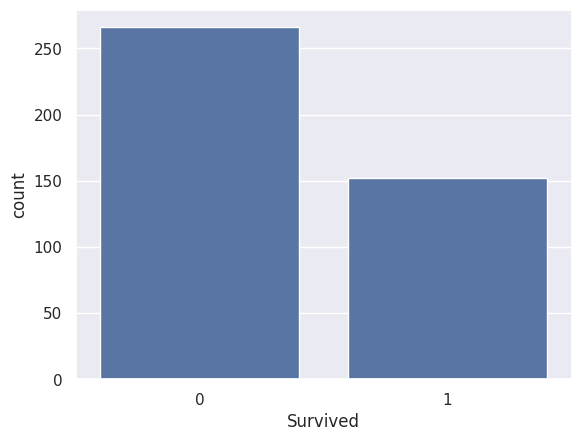

In [55]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

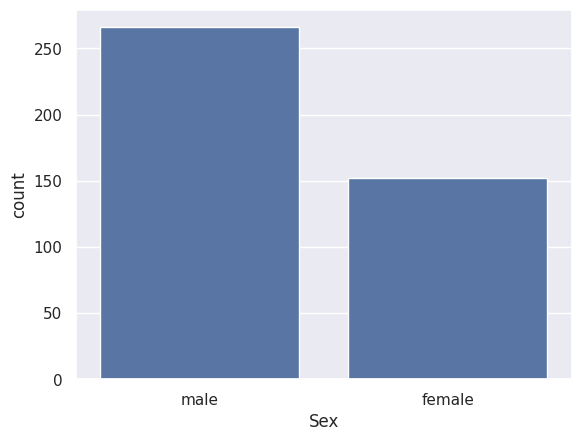

In [56]:
#making a count plot for "sex column
sns.countplot(x='Sex',data=titanic_data)

In [57]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

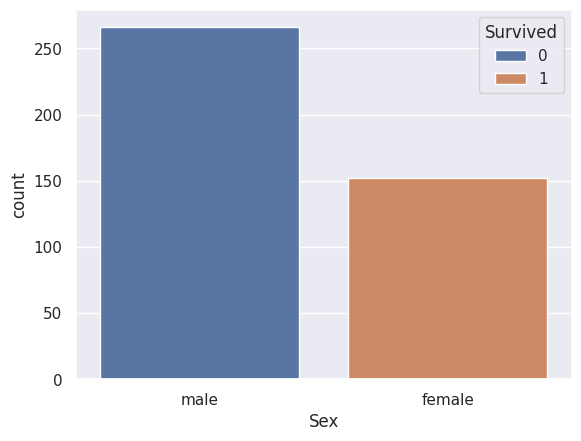

In [62]:
#number of survivors Gender wise
sns.countplot(x= 'Sex', hue= 'Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

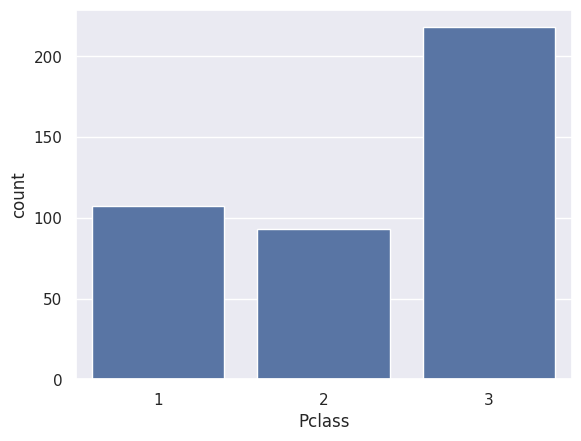

In [66]:
#Pclass
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

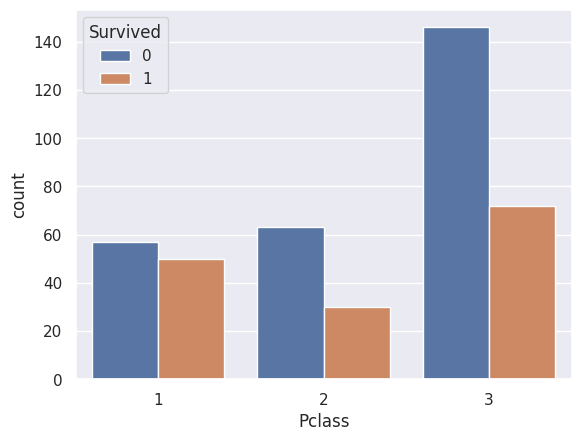

In [67]:
#number of survivors Gender wise
sns.countplot(x= 'Pclass', hue= 'Survived', data=titanic_data)

In [68]:
#Encodingthe Categorical Columns
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [69]:
#Encodingthe Categorical Columns
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [72]:
#cinverting the categorical Columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace =True)

In [73]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    0  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0   
2                     Myles, Mr. Thomas Francis    0  62.0      0      0   
3                              Wirz, Mr. Albert    0  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1      1   

    Ticket     Fare  Embarked  
0   330911   7.8292         2  
1   363272   7.0000         0  
2   240276   9.6875         2  
3   315154   8.6625         0  
4  3101298  12.2875         0

Separating the target column from features


1.   List item
2.   List item



In [74]:
X= titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [75]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data into training data & Test data

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [77]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training
Logistic Regression (sigmoid funcion)
Y=1/1+e^-z and Z=w.X+b

In [78]:
model= LogisticRegression()

In [79]:
#training the LogicticRegression model with training the data

In [80]:
model.fit(X_train,Y_train)

LogisticRegression()

Model evaluation
Accuracy score

In [81]:
X_train_prediction = model.predict(X_train)

In [82]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [84]:
training_data_accuracy= accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 1.0


In [85]:
#accuracy on training data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [86]:
test_data_accuracy= accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of training data :',test_data_accuracy)

Accuracy score of training data : 1.0
